# Linear Regression Advertising Dataset:

    1. Data Preprocessing
    2. Univariate Analysis
    3. Bivariate Analysis
    4. Outlier Treatment
    5. Splitting Data
    6. Training step
    7. Testing step
    8. Prediction
    9. Validation of the model

In [38]:
import numpy as np
import statsmodels
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import os
import seaborn as sns

# Data Import

In [101]:
df = pd.read_csv(r"D:\Python\Linear Regression\Multiple\Cellphone.csv", header=0)

In [52]:
df

,Price,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,thickness
0,2357,424,8,1.350,16.0,3.000,13.00,8.0,7.4
1,1749,233,2,1.300,4.0,1.000,3.15,0.0,9.9
2,1916,312,4,1.200,8.0,1.500,13.00,5.0,7.6
3,1315,233,2,1.300,4.0,0.512,3.15,0.0,11.0
4,1749,233,2,1.300,4.0,1.000,3.15,0.0,9.9
...,...,...,...,...,...,...,...,...,...
156,3551,538,4,1.875,128.0,6.000,12.00,16.0,8.4
157,3211,534,4,1.975,128.0,6.000,20.00,8.0,7.9
158,3260,401,8,2.200,64.0,4.000,20.00,20.0,6.8
159,3211,534,4,1.975,128.0,6.000,20.00,8.0,7.9


# Data Type 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   ppi           161 non-null    int64  
 2   cpu core      161 non-null    int64  
 3   cpu freq      161 non-null    float64
 4   internal mem  161 non-null    float64
 5   ram           161 non-null    float64
 6   RearCam       161 non-null    float64
 7   Front_Cam     161 non-null    float64
 8   thickness     161 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 11.4 KB


# Univariate Analysis

In [54]:
# Let's look at some statistical information about our dataframe.
df.describe()

,Price,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,8.921739
std,768.187171,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,2.192564
min,614.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000
25%,1734.000000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,7.600000
50%,2258.000000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,8.400000
75%,2744.000000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,9.800000
max,4361.000000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,18.500000


# BOX PLOT

<AxesSubplot:>

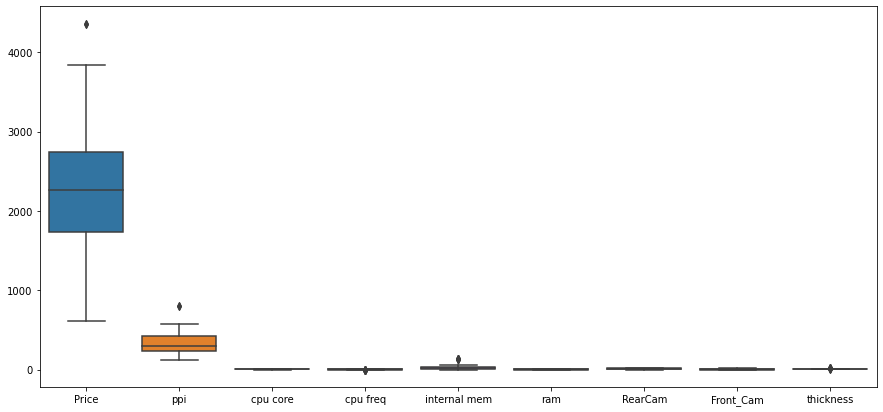

In [55]:
fig, ax = plt.subplots(figsize=[15,7])
sns.boxplot(data=df,ax=ax)


# Bi-Variate Analysis

# Correlation Matrix

In [56]:
df.corr()

,Price,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,thickness
Price,1.000000,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,-0.716773
ppi,0.817614,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,-0.496791
cpu core,0.686811,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,-0.697935
cpu freq,0.727383,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,-0.614458
internal mem,0.776738,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,-0.367412
ram,0.896915,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,-0.521074
RearCam,0.739538,0.774008,0.611353,0.625104,0.451917,0.648073,1.000000,0.596374,-0.550998
Front_Cam,0.675286,0.491371,0.586698,0.358319,0.555733,0.647470,0.596374,1.000000,-0.493542
thickness,-0.716773,-0.496791,-0.697935,-0.614458,-0.367412,-0.521074,-0.550998,-0.493542,1.000000


<AxesSubplot:>

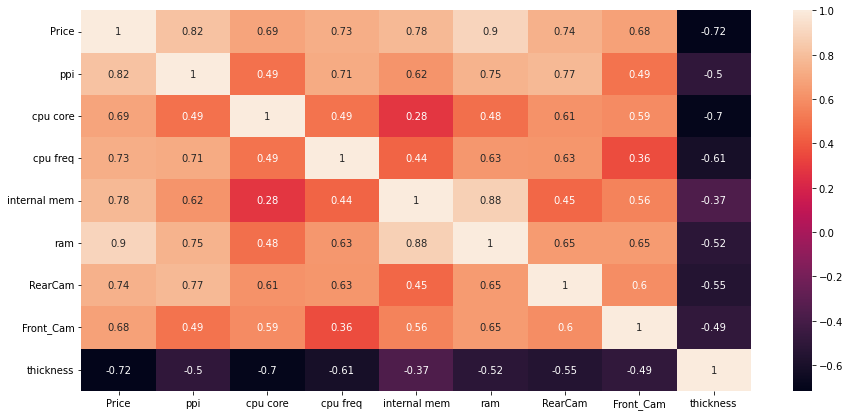

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize=[15,7])
sns.heatmap(df.corr(),annot = True, ax=ax)

# Create total plot

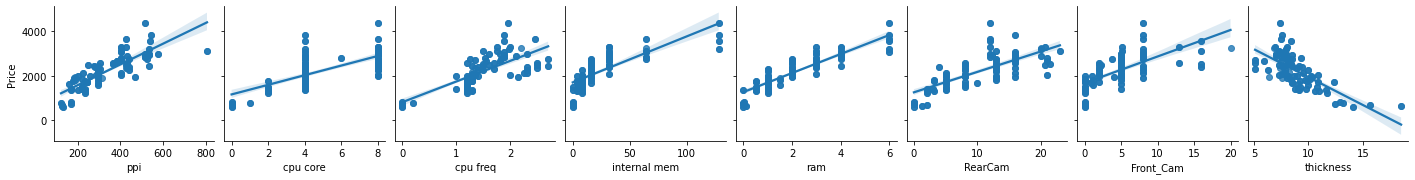

In [58]:
sns.pairplot(df,x_vars=["ppi","cpu core","cpu freq","internal mem","ram","RearCam","Front_Cam","thickness"],y_vars="Price", kind='reg')

# create X and y

In [59]:
X = df[['ppi', 'cpu core', 'cpu freq','internal mem','ram','RearCam','Front_Cam','thickness']]
Y = df['Price']

# Collinearity Check using VIF

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,ppi,29.14
1,cpu core,9.40
2,cpu freq,16.60
3,internal mem,9.43
4,ram,24.07
5,RearCam,13.18
6,Front_Cam,4.94
7,thickness,4.82


# Checking Skewness

array([[<AxesSubplot:title={'center':'ppi'}>,
        <AxesSubplot:title={'center':'cpu core'}>,
        <AxesSubplot:title={'center':'cpu freq'}>],
       [<AxesSubplot:title={'center':'internal mem'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'RearCam'}>],
       [<AxesSubplot:title={'center':'Front_Cam'}>,
        <AxesSubplot:title={'center':'thickness'}>, <AxesSubplot:>]],
      dtype=object)

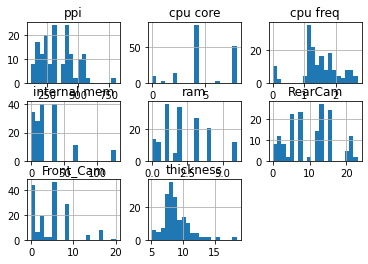

In [61]:
# By plotting method

X.hist(bins=20)

In [62]:
# Calculate Skewness value

from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)

ppi             0.596875
cpu core       -0.008992
cpu freq       -0.507874
internal mem    2.367361
ram             0.785293
RearCam         0.105930
Front_Cam       1.158823
thickness       1.572849
dtype: float64
internal mem    2.367361
ram             0.785293
Front_Cam       1.158823
thickness       1.572849
dtype: float64


# Outlier Treatment

In [63]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
q1,q3,iqr,low,high

(1734.0, 2744.0, 1010.0, 219.0, 4259.0)

In [64]:
df['Price']=np.where(df['Price'] > high,high,df['Price']) # upper limit

<AxesSubplot:>

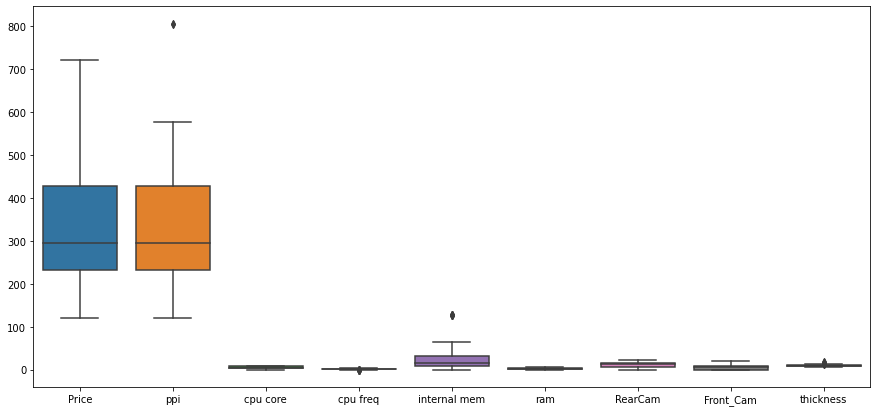

In [73]:
fig, ax = plt.subplots(figsize=[15,7])
sns.boxplot(data=df,ax=ax)


In [68]:
q1 = df['ppi'].quantile(0.25)
q3 = df['ppi'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


In [67]:
q1,q3,iqr,low,high

(233.0, 428.0, 195.0, -59.5, 720.5)

In [71]:
df['Price']=np.where(df['ppi'] > high,high,df['ppi']) # upper limit

<AxesSubplot:>

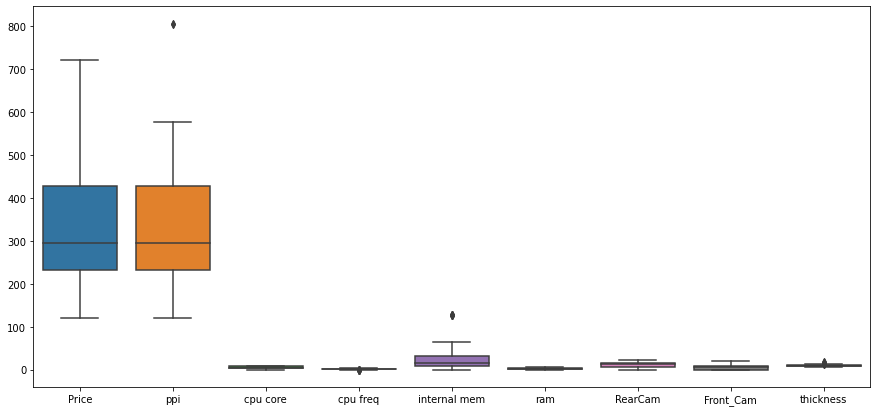

In [74]:
fig, ax = plt.subplots(figsize=[15,7])
sns.boxplot(data=df,ax=ax)

In [79]:
q1 = df['internal mem'].quantile(0.25)
q3 = df['internal mem'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


In [80]:
q1,q3,iqr,low,high

(8.0, 32.0, 24.0, -28.0, 68.0)

In [82]:
df['internal mem']=np.where(df['internal mem'] > high,high,df['internal mem']) # upper limit

<AxesSubplot:>

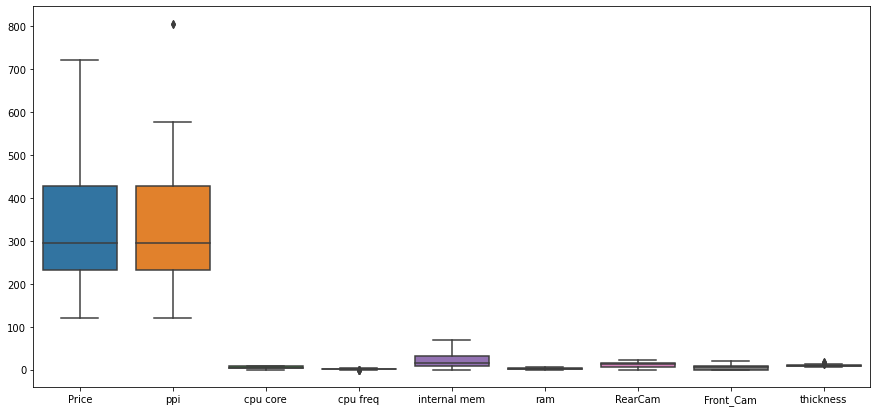

In [83]:
fig, ax = plt.subplots(figsize=[15,7])
sns.boxplot(data=df,ax=ax)

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [102]:
# Putting feature variable to X
X = df.drop('Price', axis= 1)

# Putting response variable to y
y = df['Price']

In [103]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [104]:
df = pd.concat([y_train, X_train], axis=1)
df.columns

Index(['Price', 'ppi', 'cpu_core', 'cpu_freq', 'internal_mem', 'ram',
       'RearCam', 'Front_Cam', 'thickness'],
      dtype='object')

# Train Model Building

In [105]:
import statsmodels.formula.api as smf
model=smf.ols('Price ~ ppi + cpu_core + cpu_freq + internal_mem + ram + RearCam + Front_Cam + thickness',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     227.2
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           7.87e-62
Time:                        14:16:59   Log-Likelihood:                -739.89
No. Observations:                 112   AIC:                             1498.
Df Residuals:                     103   BIC:                             1522.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1556.7236    174.572      8.917      0.000    1210.501    1902.946
ppi              1.1790      0.279      4.229      0.000       0.626       1.732
cpu_core        61.9778     12.203      5.079      0.000      37.777      86.179
cpu_freq        94.9167     48.160      1.971      0.051      -0.598     190.432
internal_mem     7.0565      1.372      5.144      0.000       4.336       9.777
ram            132.1976     30.655      4.312      0.000      71.401     192.994
RearCam         -0.8551      5.391     -0.159      0.874     -11.548       9.838
Front_Cam        1.6776      6.621      0.253      0.800     -11.454      14.809
thickness      -72.5204     13.171     -5.506      0.000     -98.642     -46.398
==============================================================================
Omnibus:                        0.218   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.189
Skew:                           0.096   Prob(JB):                        0.910
Kurtosis:                       2.939   Cond. No.                     3.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# removing the insignificant variable 
model2=smf.ols('Price ~ ppi + cpu_core + cpu_freq + internal_mem + ram + thickness',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     308.6
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           2.65e-64
Time:                        14:18:09   Log-Likelihood:                -739.94
No. Observations:                 112   AIC:                             1494.
Df Residuals:                     105   BIC:                             1513.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1561.8162    171.880      9.087      0.000    1221.011    1902.622
ppi              1.1546      0.236      4.883      0.000       0.686       1.623
cpu_core        62.7321     10.650      5.890      0.000      41.615      83.849
cpu_freq        91.9370     46.465      1.979      0.050      -0.194     184.068
internal_mem     7.1262      1.330      5.358      0.000       4.489       9.763
ram            133.4096     29.331      4.548      0.000      75.251     191.569
thickness      -72.7274     13.010     -5.590      0.000     -98.525     -46.930
==============================================================================
Omnibus:                        0.168   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.142
Skew:                           0.082   Prob(JB):                        0.932
Kurtosis:                       2.941   Cond. No.                     3.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Testing Step

In [108]:
print(X_test)

     ppi  cpu_core  cpu_freq  internal_mem    ram  RearCam  Front_Cam  \
145  184         4     1.300         8.000  1.000    13.00        8.0   
11   200         8     1.400         4.000  1.000     5.00        0.0   
88   235         2     1.200         8.000  1.000     2.00        0.0   
7    401         4     2.300        16.000  2.000    16.00        8.0   
65   401         6     1.530        32.000  3.000    21.00        8.0   
96   367         8     1.700        16.000  2.000    13.00       13.0   
136  294         4     1.300        32.000  3.000     8.00        5.0   
32   428         8     1.750        32.000  3.000    20.70        5.1   
111  534         8     1.600        32.000  3.000    16.00        8.0   
1    233         2     1.300         4.000  1.000     3.15        0.0   
128  247         8     1.600        32.000  3.000     8.00        2.0   
77   170         4     1.200         4.000  1.000     3.00        0.0   
15   294         4     1.200         8.000  1.500  

# Prediction on Test Data

In [109]:
Y_pred=model2.predict(X_test)
print(Y_pred)

145    1753.304788
11     1937.940913
88     1488.439011
7      2177.112979
65     2493.759516
96     2428.169283
136    2281.791875
32     2845.169299
111    2946.491219
1      1517.728076
128    2542.400067
77     1626.714921
15     1792.364602
29     1873.132377
84     1643.673815
40     2092.711879
157    3748.925358
131    1310.346685
45     2019.818090
125     580.235770
156    3707.986260
150     685.833844
26     1937.940913
119    1510.022257
69     2449.785402
75     2354.588685
54     1845.454464
139    2344.587499
46     1432.315812
41     2347.246544
160    2528.646021
81      823.906924
20     2723.071537
31     3128.448925
28     1727.493947
82     3032.714830
154    2528.646021
142    2515.465594
12     1922.772170
16     2186.932374
59     1501.812449
126     580.235770
51     1438.067725
122    1859.968482
147    3216.144924
127    2542.400067
116    2890.389436
99     1634.453664
140     383.045754
dtype: float64


# Building a new data frame with actual and predicted sales 

In [111]:
new_df=pd.DataFrame()
new_df=X_test
new_df["Actual Price"]=y_test
new_df["Predicted Price"]=Y_pred
print(new_df)

     ppi  cpu_core  cpu_freq  internal_mem    ram  RearCam  Front_Cam  \
145  184         4     1.300         8.000  1.000    13.00        8.0   
11   200         8     1.400         4.000  1.000     5.00        0.0   
88   235         2     1.200         8.000  1.000     2.00        0.0   
7    401         4     2.300        16.000  2.000    16.00        8.0   
65   401         6     1.530        32.000  3.000    21.00        8.0   
96   367         8     1.700        16.000  2.000    13.00       13.0   
136  294         4     1.300        32.000  3.000     8.00        5.0   
32   428         8     1.750        32.000  3.000    20.70        5.1   
111  534         8     1.600        32.000  3.000    16.00        8.0   
1    233         2     1.300         4.000  1.000     3.15        0.0   
128  247         8     1.600        32.000  3.000     8.00        2.0   
77   170         4     1.200         4.000  1.000     3.00        0.0   
15   294         4     1.200         8.000  1.500  

C:\Users\Vikas Apte\AppData\Local\Temp/ipykernel_22380/2564086848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Actual Price"]=y_test
C:\Users\Vikas Apte\AppData\Local\Temp/ipykernel_22380/2564086848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Predicted Price"]=Y_pred


# MSE & MAE & RMSE for evaluation of Model on test data 

In [112]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math
# calculate the mean squared error
model_mse = mean_squared_error(new_df['Actual Price'],new_df['Predicted Price'])
# calculate the mean absolute error
model_mae = mean_absolute_error(new_df['Actual Price'],new_df['Predicted Price'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 3.55e+04
MAE 1.44e+02
RMSE 1.88e+02


# Assumption of Model

* Normality
* Homoscedasticity
* Model Error has to be independently identificaly Distibuted

In [113]:
df['fitted_value']=model2.fittedvalues
df['residual']=model2.resid

# Homoscedasticity

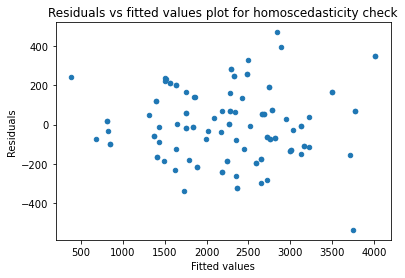

In [114]:
p = df.plot.scatter(x='fitted_value',y='residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

# Normality

C:\Users\Vikas Apte\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


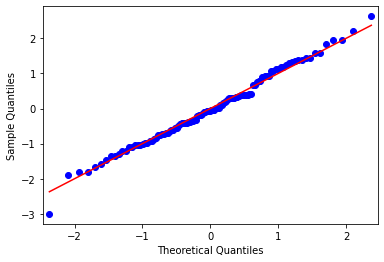

In [115]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.stats as stats
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

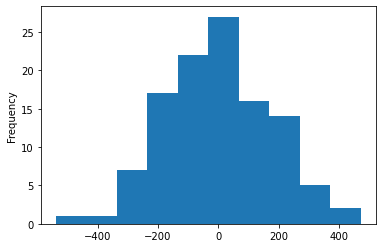

In [116]:
df['residual'].plot.hist()

# Durbin Watson Test

In [117]:
import statsmodels 
statsmodels.stats.stattools.durbin_watson(df['residual'], axis=0)

1.8115494686943867